In [3]:
"""
Challenge Set 1
Topic:        Explore MTA turnstile data
Date:         04/18/2016
Name:         Zakkir Ganesh
Worked with:  Cecilia Wong, Hannah Deen, Ajit Unnam
"""

import csv

mta1_csv = list(csv.reader(open("turnstile_160402.txt")))
mta1_list = []
for entry in mta1_csv:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta1_list.append(cleaner_entry)

mta_ts_dict = {}
for entry in mta1_list[1:11]:
    entry_key = tuple(entry[:4])
    entry_value = [entry[4:]]
    if entry_key in mta_ts_dict:
        mta_ts_dict[entry_key] += entry_value
    else:
        mta_ts_dict[entry_key] = entry_value




In [221]:

from dateutil import parser

mta_timestamp_dict = {}
for entry in mta1_list[1:11]:
    entry_key = tuple(entry[:4])
    time_str = str(entry[6]) + " " + str(entry[7])
    dt_entry = parser.parse(time_str)
    entry_value = [dt_entry, entry[-2]]
    if entry_key in mta_timestamp_dict:
        mta_timestamp_dict[entry_key] += [entry_value]
    else:
        mta_timestamp_dict[entry_key] = [entry_value]



{('A002', 'R051', '02-00-00', '59 ST'): [['NQR456', 'BMT', '03/26/2016', '00:00:00', 'REGULAR', '0005595746', '0001893277'], ['NQR456', 'BMT', '03/26/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '16:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/26/2016', '20:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '00:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '04:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '08:00:00', 'REGULAR', '0005595746', '0001893282'], ['NQR456', 'BMT', '03/27/2016', '12:00:00', 'REGULAR', '0005595746', '0001893282'], datetime.datetime(2016, 3, 26, 0, 0), '0001893277', datetime.datetime(2016, 3, 26, 4, 0), '0001893282', datetime.dateti

In [274]:
mta_nested_dict = {}
for entry in mta1_list[1:]:
    key1 = tuple(entry[:4])
    if key1 in mta_nested_dict:
        key2 = parser.parse(entry[6])
        if key2 in mta_nested_dict[key1]:
            mta_nested_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_nested_dict[key1][key2] = [int(entry[-2])]
    else:
        mta_nested_dict[key1] = {}
        key2 = parser.parse(entry[6])
        if key2 in mta_nested_dict[key1]:
            mta_nested_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_nested_dict[key1][key2] = [int(entry[-2])]

import collections

for key1 in mta_nested_dict:
    for key2 in mta_nested_dict[key1]:
        x = mta_nested_dict[key1][key2][0]
        y = mta_nested_dict[key1][key2][-1]
        mta_nested_dict[key1][key2] = y - x

mta_od = collections.OrderedDict(sorted(mta_nested_dict.items()))
for key in mta_od:
    mta_od[key] = collections.OrderedDict(sorted(mta_od[key].items()))
    
#print(mta_od)

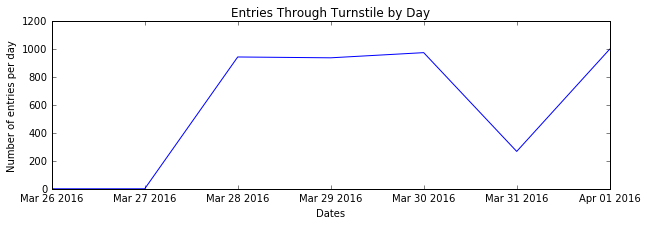

In [275]:
%matplotlib inline

ts_list = list(mta_od.keys())
ts_date_list = []
ts_entry_change_list = []
for date in mta_od[ts_list[0]]:
    ts_date_list.append(date)
    ts_entry_change_list.append(mta_od[ts_list[0]][date])

plt.figure(figsize=(10,3))
plt.plot(ts_date_list, ts_entry_change_list)
plt.xlabel("Dates")
plt.ylabel("Number of entries per day")
plt.title("Entries Through Turnstile by Day")
#plt.show()

In [272]:
mta_caus_dict = {}
for entry in mta1_list[1:]:
    key1 = entry[0:2]
    key1.append(entry[3])
    key1 = tuple(key1)
    if key1 in mta_caus_dict:
        key2 = parser.parse(entry[6])
        if key2 in mta_caus_dict[key1]:
            mta_caus_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_caus_dict[key1][key2] = [int(entry[-2])]
    else:
        mta_caus_dict[key1] = {}
        key2 = parser.parse(entry[6])
        if key2 in mta_caus_dict[key1]:
            mta_caus_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_caus_dict[key1][key2] = [int(entry[-2])]

for key1 in mta_caus_dict:
    for key2 in mta_caus_dict[key1]:
        x = mta_caus_dict[key1][key2][0]
        y = mta_caus_dict[key1][key2][-1]
        mta_caus_dict[key1][key2] = y - x

mta_caus_od = collections.OrderedDict(sorted(mta_caus_dict.items()))
for key in mta_caus_od:
    mta_caus_od[key] = collections.OrderedDict(sorted(mta_caus_od[key].items()))

#print(mta_caus_od)
"""
caus_list = list(mta_caus_od.keys())
print(caus_list)
caus_date_list = []
caus_entry_change_list = []
for date in mta_caus_od[caus_list[0]]:
    caus_date_list.append(date)
    caus_entry_change_list.append(mta_caus_od[caus_list[0]][date])

plt.figure(figsize=(10,3))
plt.plot(caus_date_list, caus_entry_change_list)
plt.xlabel("Dates")
plt.ylabel("Number of entries per day")
plt.title("Entries Through MTA CAUS by Day")
plt.show()
"""


'\ncaus_list = list(mta_caus_od.keys())\nprint(caus_list)\ncaus_date_list = []\ncaus_entry_change_list = []\nfor date in mta_caus_od[caus_list[0]]:\n    caus_date_list.append(date)\n    caus_entry_change_list.append(mta_caus_od[caus_list[0]][date])\n\nplt.figure(figsize=(10,3))\nplt.plot(caus_date_list, caus_entry_change_list)\nplt.xlabel("Dates")\nplt.ylabel("Number of entries per day")\nplt.title("Entries Through MTA CAUS by Day")\nplt.show()\n'

In [284]:
mta_station_dict = {}
for entry in mta1_list[1:]:
    key1 = [entry[3].replace(",","")]
    key1 = tuple(key1)
    if key1 in mta_station_dict:
        key2 = parser.parse(entry[6])
        if key2 in mta_station_dict[key1]:
            mta_station_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_station_dict[key1][key2] = [int(entry[-2])]
    else:
        mta_station_dict[key1] = {}
        key2 = parser.parse(entry[6])
        if key2 in mta_station_dict[key1]:
            mta_station_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_station_dict[key1][key2] = [int(entry[-2])]

#print(mta_station_dict)

for key1 in mta_station_dict:
    for key2 in mta_station_dict[key1]:
        x = mta_station_dict[key1][key2][0]
        y = mta_station_dict[key1][key2][-1]
        mta_station_dict[key1][key2] = y - x

mta_station_od = collections.OrderedDict(sorted(mta_station_dict.items()))
for key in mta_station_od:
    mta_station_od[key] = collections.OrderedDict(sorted(mta_station_od[key].items()))
#print(mta_station_od)

('ZEREGA AV',)
[datetime.datetime(2016, 3, 26, 0, 0), datetime.datetime(2016, 3, 27, 0, 0), datetime.datetime(2016, 3, 28, 0, 0), datetime.datetime(2016, 3, 29, 0, 0), datetime.datetime(2016, 3, 30, 0, 0), datetime.datetime(2016, 3, 31, 0, 0), datetime.datetime(2016, 4, 1, 0, 0)]
[-53049438, -53049580, -53049659, -53050022, -53050382, -53050754, -53049973]


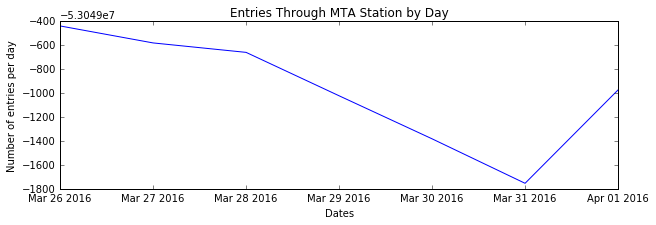

In [390]:
station_list = list(mta_station_od.keys())
print(station_list[-1])
station_date_list = []
station_entry_change_list = []
for date in mta_station_od[station_list[-1]]:
    station_date_list.append(date)
    station_entry_change_list.append(mta_station_od[station_list[-1]][date])

print(station_date_list)
print(station_entry_change_list)

plt.figure(figsize=(10,3))
plt.plot(station_date_list, station_entry_change_list)
plt.xlabel("Dates")
plt.ylabel("Number of entries per day")
plt.title("Entries Through MTA Station by Day")
#plt.show()


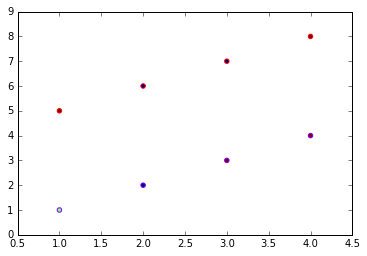

In [330]:
#import matplotlib as mpl

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

x = [1,2,3,4]
y_mat = np.array([[1,2,3,4], [5,6,7,8]])

n, _ = y_mat.shape

colors = mpl.cm.rainbow(np.linspace(0, 1, n))
fig, ax = plt.subplots()
for color, y in zip(colors, y_mat):
    ax.scatter(x, y, color=color)
plt.show()

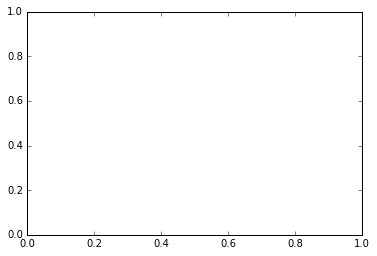

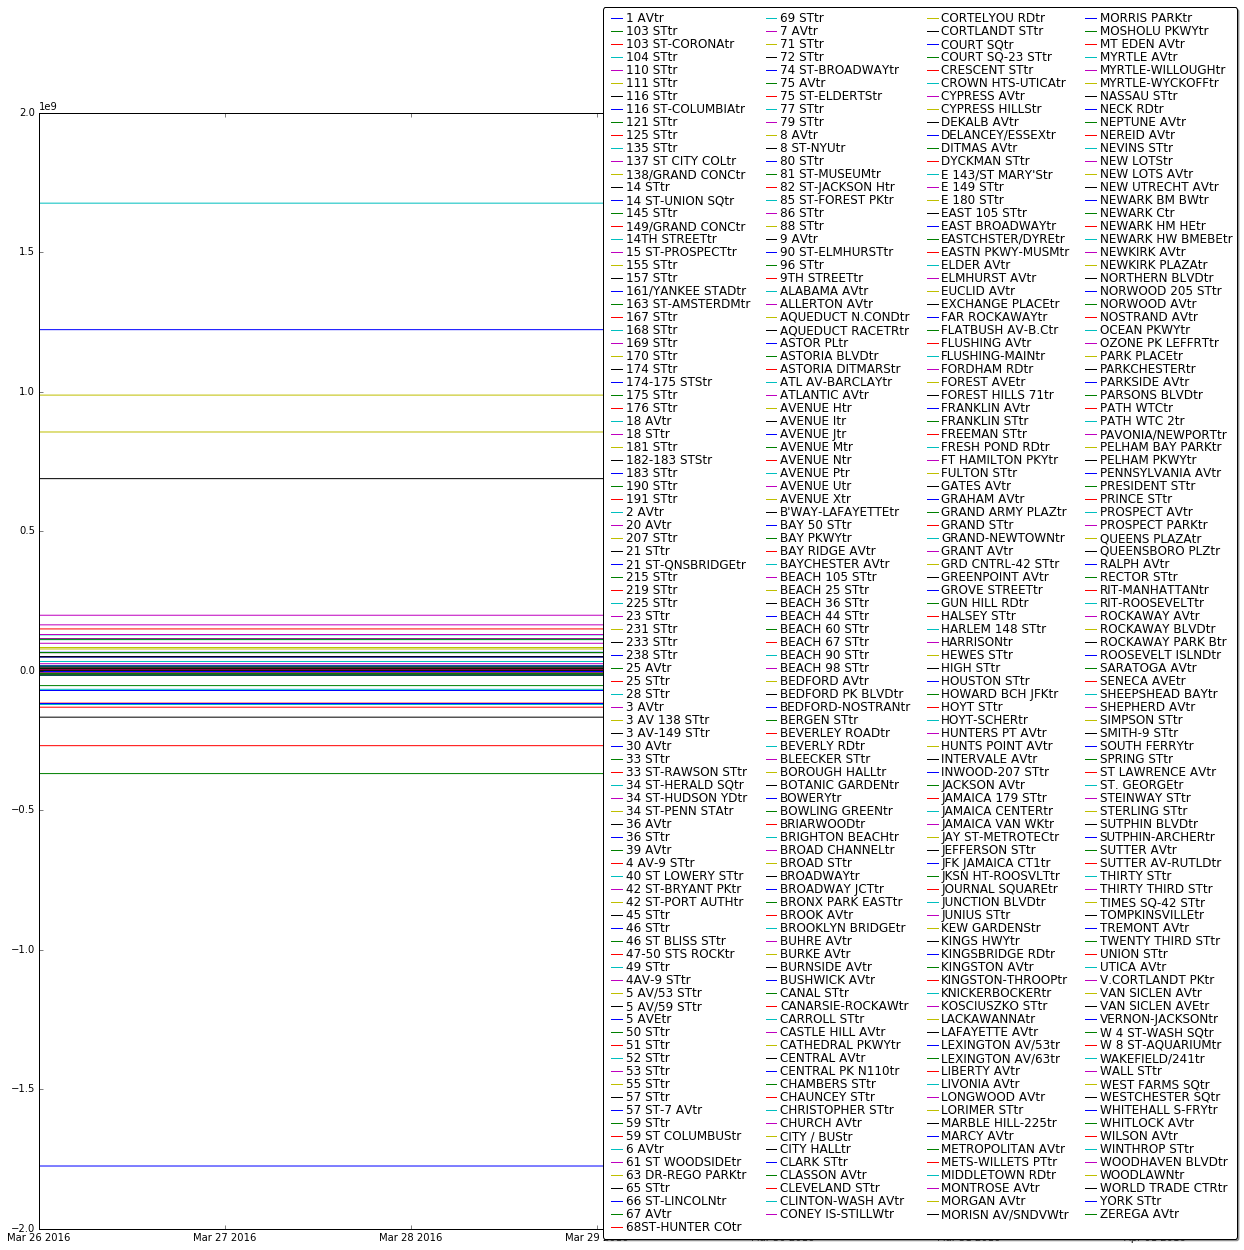

In [419]:
import numpy as np

april_1_date_obj = parser.parse('04/01/2016')
mta_station_od[('ZEREGA AV',)][april_1_date_obj] = -53049973

x = []
y = []
for station in mta_station_od:
    x.append(list(mta_station_od[station].keys()))
    y_temp = list(mta_station_od[station].values())
    y.append(y_temp)
x = x[0]

n = len(y)

colormap = plt.cm.rainbow
plt.gca().set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 10, n)])
plt.figure(figsize=(20,20))
labels = []
for i in range(0, n):
    plt.plot(x, y[i])
    labels.append(r'%str' % (station_list[i]))

plt.legend(labels, ncol=4, loc='upper left', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)


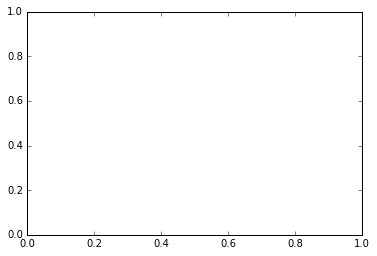

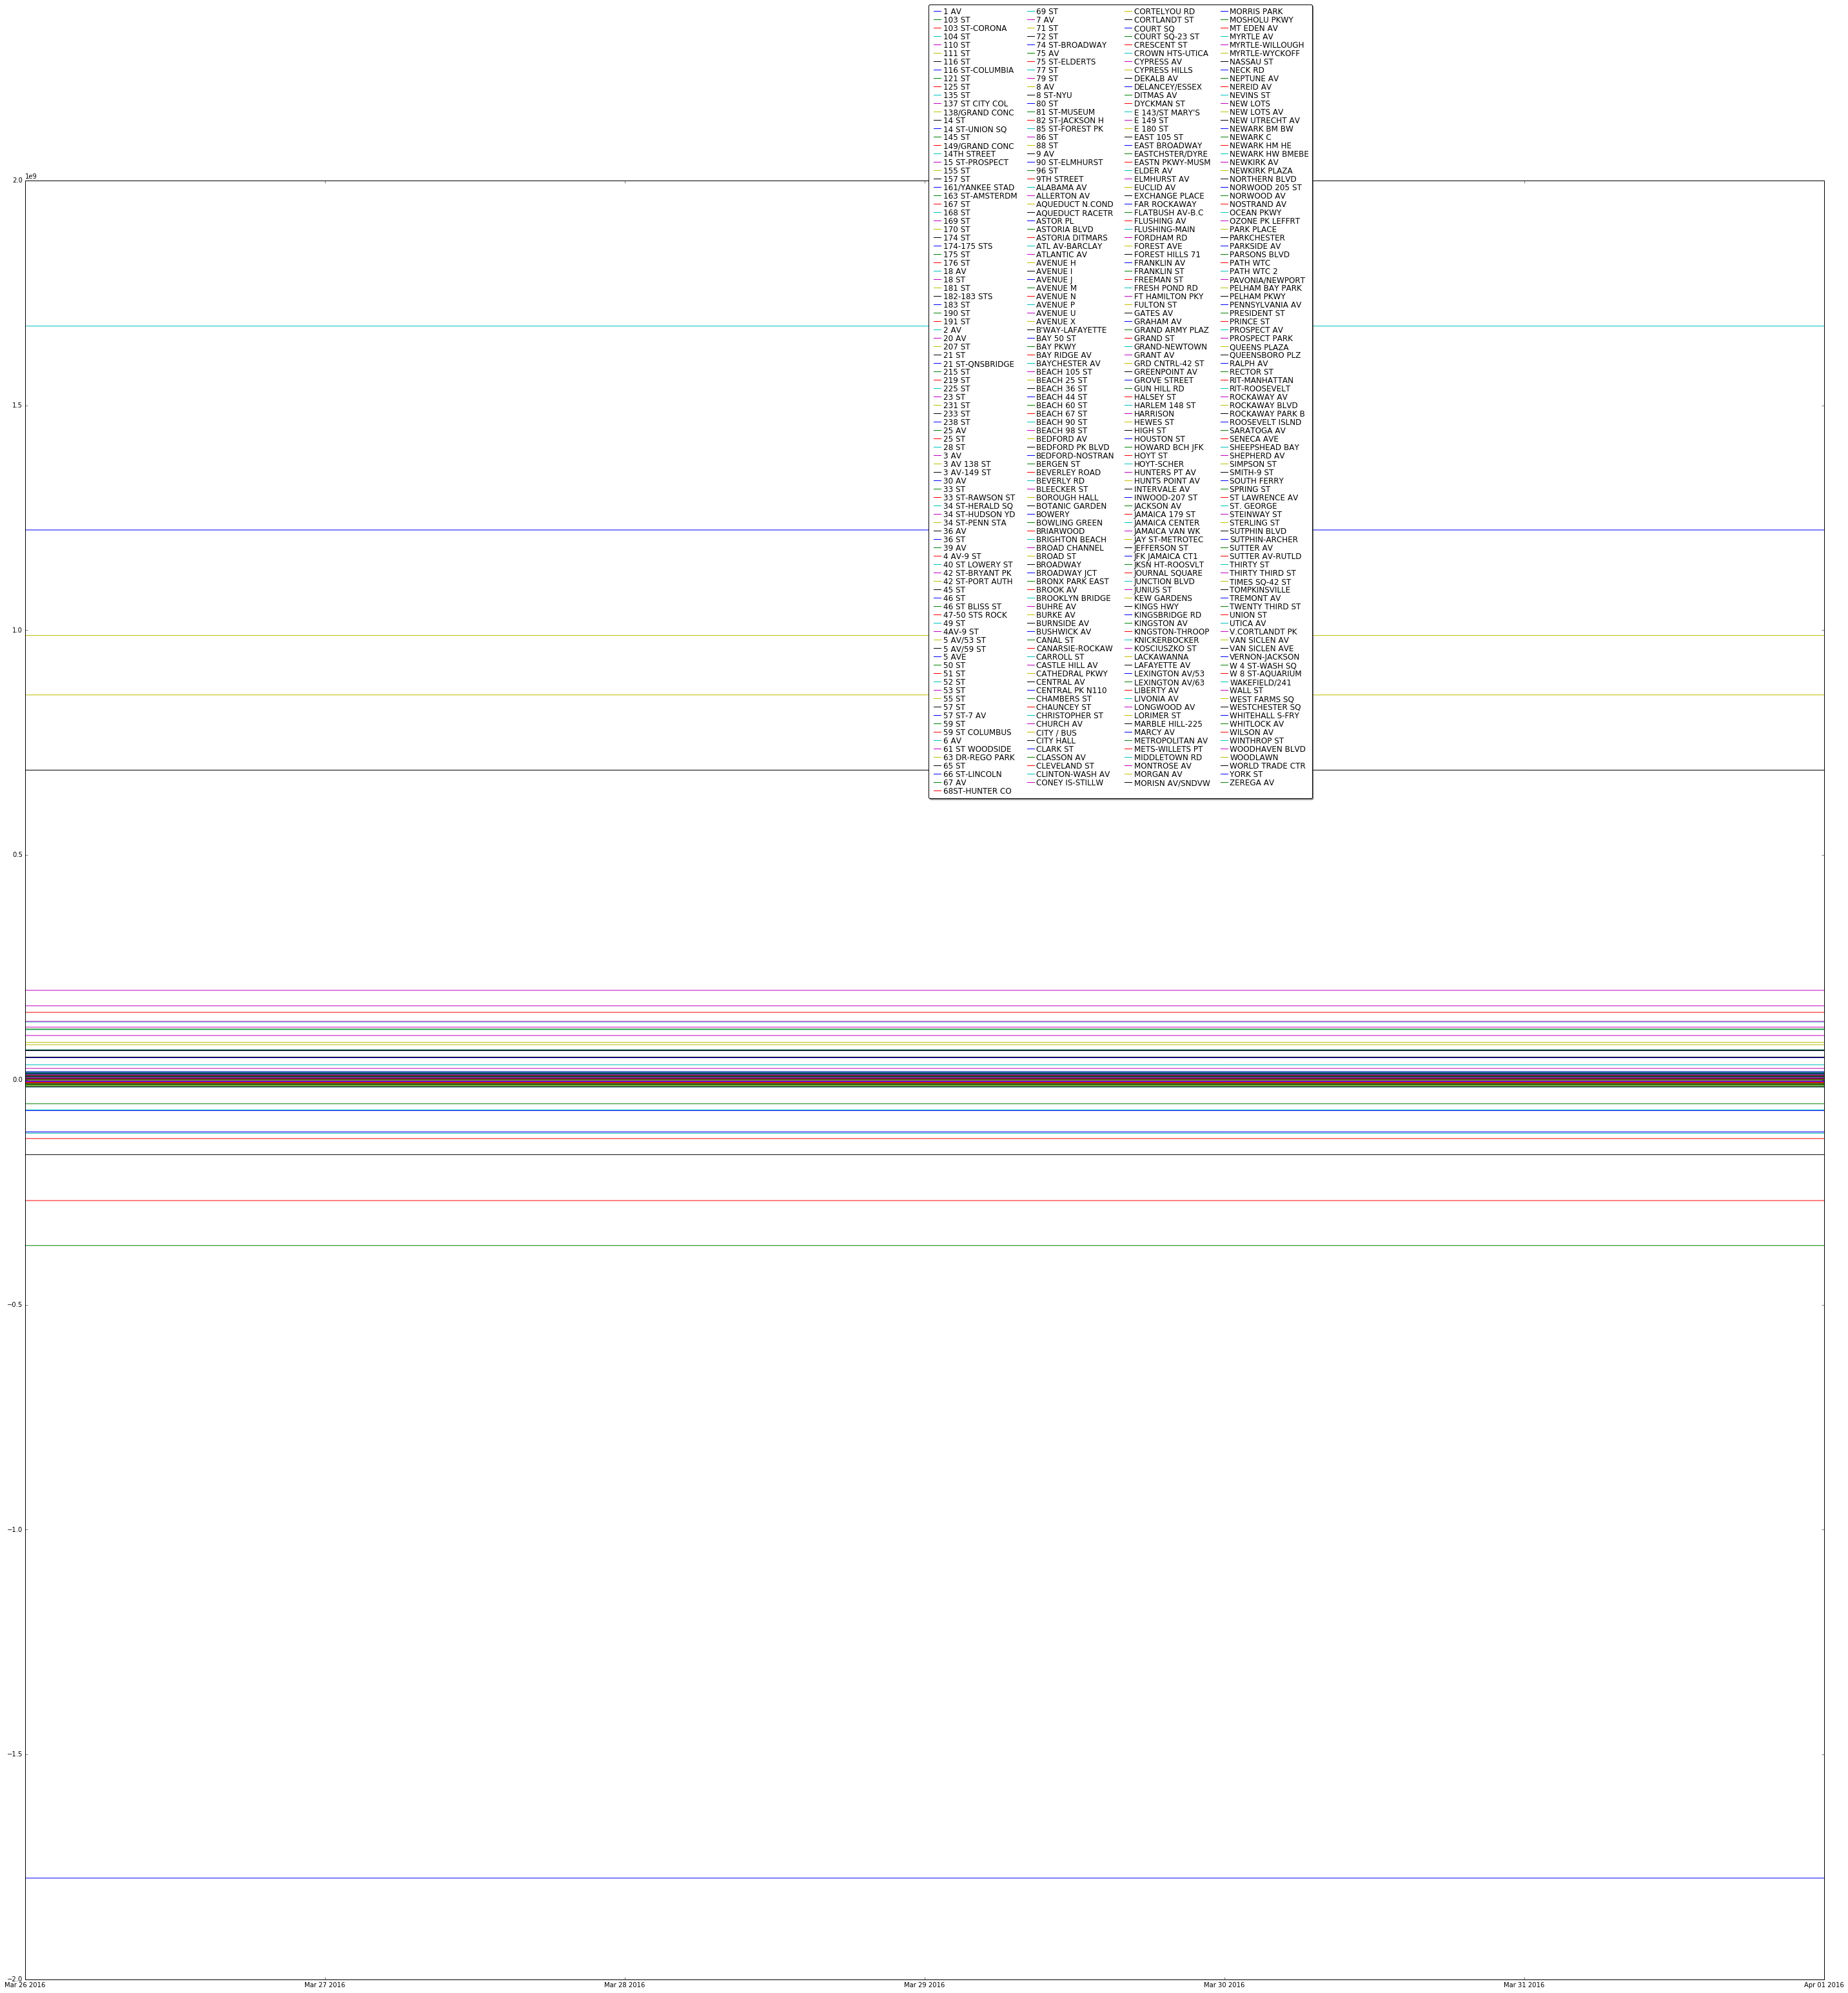

In [450]:
import numpy as np

april_1_date_obj = parser.parse('04/01/2016')
mta_station_od[('ZEREGA AV',)][april_1_date_obj] = -53049973

x = []
y = []

for station in mta_station_od:
    x.append(list(mta_station_od[station].keys()))
    y_temp = list(mta_station_od[station].values())
    y.append(y_temp)

#print(mar_27)
#print(len(mar_27))

x = x[0]

n = len(y)

colormap = plt.cm.rainbow
plt.gca().set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 1, n)])
plt.figure(figsize=(50,50))
labels = []
for i in range(0, n):
    plt.plot(x, y[i])
    labels.append(r'%s' % (station_list[i]))

plt.legend(labels, ncol=4, loc='upper left', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)



In [2]:
import csv

mta1_csv = list(csv.reader(open("turnstile_160402.txt")))
mta_list = []
for entry in mta1_csv:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)



mta2_csv = list(csv.reader(open("turnstile_160326.txt")))
for entry in mta2_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta2_list[:40])

mta3_csv = list(csv.reader(open("turnstile_160319.txt")))
mta3_list = []
for entry in mta3_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta3_list[:30])

mta4_csv = list(csv.reader(open("turnstile_160312.txt")))
for entry in mta4_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta4_list[:30])

mta5_csv = list(csv.reader(open("turnstile_160305.txt")))
mta5_list = []
for entry in mta5_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta1_list.append(cleaner_entry)
    mta_list.append(cleaner_entry)





NameError: name 'csv' is not defined

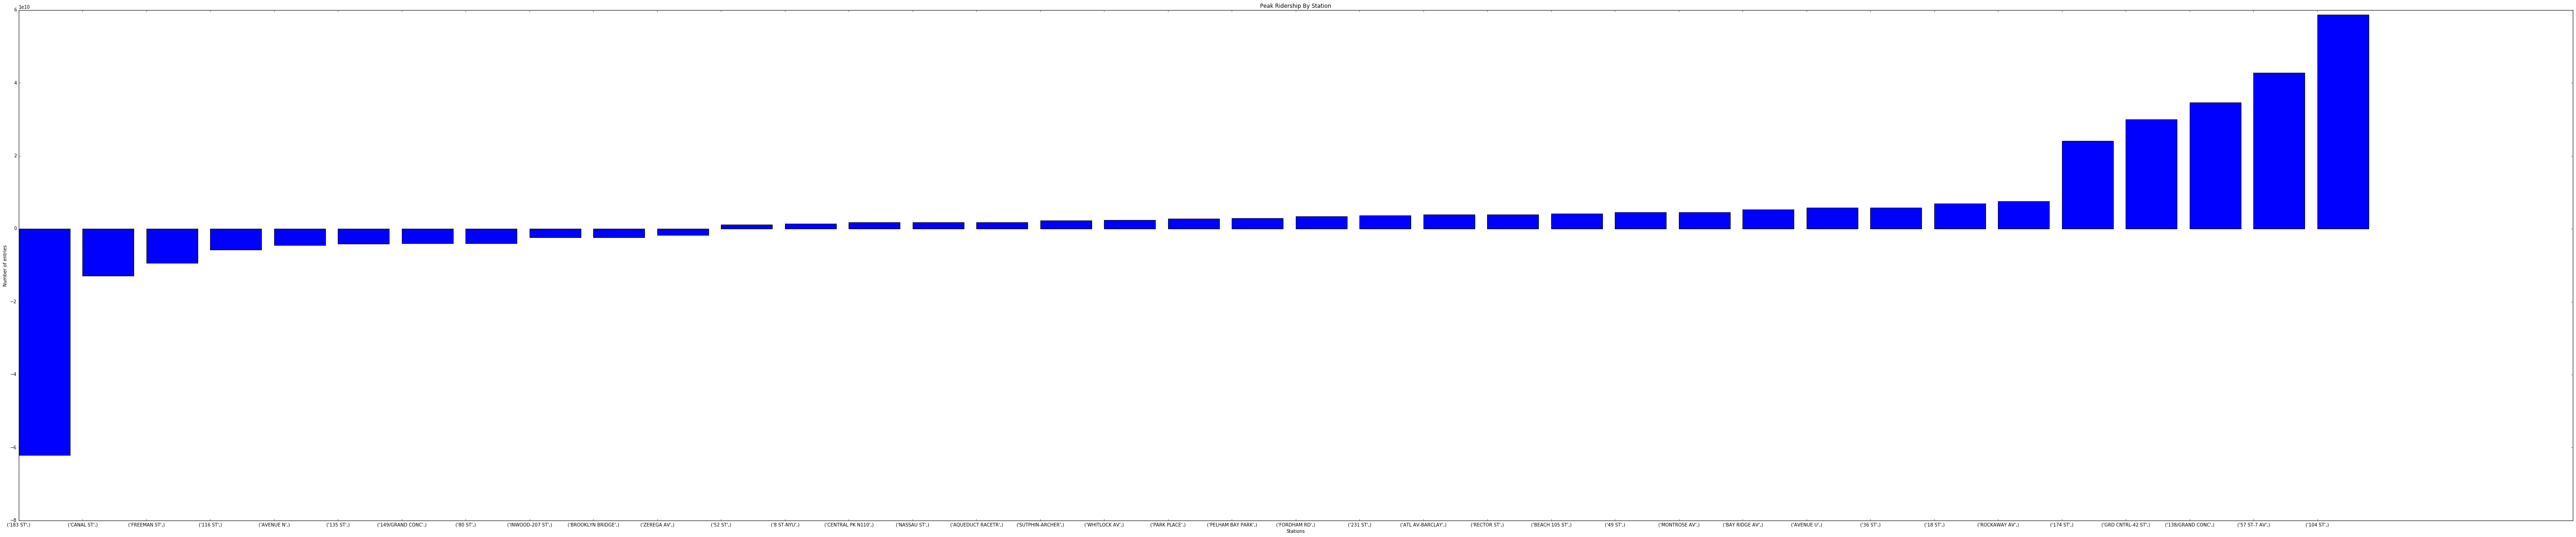

In [29]:
import csv

mta1_csv = list(csv.reader(open("turnstile_160402.txt")))
mta_list = []
for entry in mta1_csv:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)



mta2_csv = list(csv.reader(open("turnstile_160326.txt")))
for entry in mta2_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta2_list[:40])

mta3_csv = list(csv.reader(open("turnstile_160319.txt")))
mta3_list = []
for entry in mta3_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta3_list[:30])

mta4_csv = list(csv.reader(open("turnstile_160312.txt")))
for entry in mta4_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta_list.append(cleaner_entry)

#print(mta4_list[:30])

mta5_csv = list(csv.reader(open("turnstile_160305.txt")))
mta5_list = []
for entry in mta5_csv[1:]:
    entry_infos = entry
    cleaner_entry = []
    for info in entry_infos:
        info = info.strip()
        cleaner_entry.append(info)
    mta1_list.append(cleaner_entry)
    mta_list.append(cleaner_entry)






from dateutil import parser

mta_ridership_dict = {}
for entry in mta_list[1:]:
    key1 = [entry[3].replace(",","")]
    key1 = tuple(key1)
    if key1 in mta_ridership_dict:
        key2 = parser.parse(entry[6])
        if key2 in mta_ridership_dict[key1]:
            mta_ridership_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_ridership_dict[key1][key2] = [int(entry[-2])]
    else:
        mta_ridership_dict[key1] = {}
        key2 = parser.parse(entry[6])
        if key2 in mta_ridership_dict[key1]:
            mta_ridership_dict[key1][key2].append(int(entry[-2]))
        else:
            mta_ridership_dict[key1][key2] = [int(entry[-2])]

#print(mta_station_dict)
#print(mta_ridership_dict[('ZEREGA AV',)])
for key1 in mta_ridership_dict:
    for key2 in mta_ridership_dict[key1]:
        x = mta_ridership_dict[key1][key2][0]
        y = mta_ridership_dict[key1][key2][-1]
        mta_ridership_dict[key1][key2] = y - x

for key1 in mta_ridership_dict:
    mta_ridership_dict[key1] = sum(mta_ridership_dict[key1].values())

import collections

#print(mta_ridership_dict[('ZEREGA AV',)])
#print(len(mta1_list))
mta_ridership_od = collections.OrderedDict(sorted(mta_ridership_dict.items(), key=lambda x: x[1]))

#print(mta_ridership_od)

total_ridership_counts = list(mta_ridership_od.values())
ridership_stations = list(mta_ridership_od.keys())
for station in ridership_stations:
    station = str(station)

#peak_ridership = [x for x in total_ridership_counts if x >= 1000000000 or x <= -1000000000]
#print(peak_ridership)

peak_ridership = []
peak_stations = []

for i in range(0, len(total_ridership_counts)):
    if total_ridership_counts[i] <= -1000000000 or total_ridership_counts[i] >= 1000000000:
        peak_ridership.append(total_ridership_counts[i])
        peak_stations.append(str(ridership_stations[i]))

#print(peak_ridership)
#print(peak_stations)


%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl


from mpl_toolkits.mplot3d import Axes3D
import numpy as np


#print(ridership_stations)
#print(total_ridership_counts)

plt.figure(figsize=(100,20))
plt.bar(range(len(peak_stations)), peak_ridership, tick_label=peak_stations)
plt.xlabel("Stations")
plt.ylabel("Number of entries")
plt.title("Peak Ridership By Station")
plt.show()


In [ ]:
%matplotlib inline

import csv
import collections
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl


mta1_csv = list(csv.reader(open("turnstile_160402.txt")))
mta_header = mta1_csv[0]
clean_mta_header = []
for info in mta_header:
    info = info.strip()
    clean_mta_header.append(info)

mta_list = [clean_mta_header]

def open_txt(filename):
    csv_file = list(csv.reader(open(filename)))
    cleaner_list = []
    for line in csv_file[1:]:
        line_info = line
        cleaner_line = []
        for info in line_info:
            info = info.strip()
            cleaner_line.append(info)
        mta_list.append(cleaner_line)
    return cleaner_list

open_txt("turnstile_160402.txt")
open_txt("turnstile_160326.txt")
open_txt("turnstile_160319.txt")
open_txt("turnstile_160312.txt")

station_dict = {}

for entry in mta_list[1:]:
    key1 = tuple([entry[3]])
    if key1 in station_dict:
        key2 = tuple([entry[2]])
        if key2 in station_dict[key1]:
            station_dict[key1][key2].append(int(entry[-2]))
        else:
            station_dict[key1][key2] = [int(entry[-2])]
    else:
        station_dict[key1] = {}
        key2 = tuple([entry[2]])
        if key2 in station_dict[key1]:
            station_dict[key1][key2].append(int(entry[-2]))
        else:
            station_dict[key1][key2] = [int(entry[-2])]

for key1 in station_dict:
    for key2 in station_dict[key1]:
        station_dict[key1][key2] = station_dict[key1][key2][-1] - station_dict[key1][key2][0]
        if station_dict[key1][key2] < 0:
            station_dict[key1][key2] *= -1 
    station_dict[key1] = sum(station_dict[key1].values()) / 1000000

station_od = collections.OrderedDict(sorted(station_dict.items(), key=lambda x: x[1]))

"""
peak_ridership = []
peak_stations = []

for i in range(0, len(total_ridership_counts)):
    if total_ridership_counts[i] <= -1000000000 or total_ridership_counts[i] >= 1000000000:
        peak_ridership.append(total_ridership_counts[i])
        peak_stations.append(str(ridership_stations[i]))
"""

ridership_counts = list(station_od.values())
ridership_stations = list(station_od.keys())
for station in ridership_stations:
    station = str(station)

plt.figure(figsize=(900,200))
plt.bar(range(len(ridership_stations)), ridership_counts, 0.7, tick_label=ridership_stations)
plt.xlabel("Stations")
plt.ylabel("Number of entries (divided by 1,000,000)")
plt.title("Peak Ridership By Station")